In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
def dict_size(dict):
    total_count = sum(len(values) for values in dict.values())
    print(total_count)

In [40]:
def check_accuracy(csv_path, dict):

    dict = {key.lower(): [vehicle.lower() for vehicle in vehicles] for key, vehicles in dict.items()}
    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])
    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            name = path_parts[-2].strip().lower()  

            # Check if the label and vehicle name match in the dictionary
            if row['label'] in dict and name in dict[row['label']]:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)

In [41]:
def base_accuracy(csv_path):
    vehicles = [
    "Baked Potato", "Burger", "Crispy Chicken", "Donut", "Fries", "Hot Dog",
    "Pizza", "Sandwich", "Taco", "Taquito"
]

    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    # Strip and convert labels to lowercase
    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            vehicle_name = path_parts[-2].strip().lower()  

            # Check if the label and vehicle name match in the dictionary
            if row['label'] == vehicle_name:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)

In [42]:
print(base_accuracy("foodBase.csv"))

80.79


# Course

In [43]:
course_dict = {"Main Courses" : ["Burger", "Hot Dog", "Pizza", "Sandwich",
                "Taco", "Taquito", "Crispy Chicken"],
                "Side Dishes" : ["Fries", "Baked Potato"],
                "Dessert / Sweet Dishes" : ["Donut"]}

print(check_accuracy("course.csv", course_dict))

54.18


# Ingredients

In [44]:
ingredients_dict = {
    "Carb-based Food": ["Baked Potato", "Fries", "Pizza", "Donut", "Sandwich", "Taco", "Taquito"],
    "Protein-based Food": ["Burger", "Crispy Chicken", "Hot Dog", "Taco", "Taquito"]
}

print(check_accuracy("ingredients.csv", ingredients_dict))

77.42


# Cooking Method

In [45]:
cooking_method = {
    "Fried Food": ["Fries", "Crispy Chicken", "Donut", "Taquito"],
    "Not Fried Food": ["Baked Potato", "Burger", "Hot Dog", "Pizza", "Sandwich", "Taco"]
}

print(check_accuracy("fried.csv", cooking_method))

62.1


In [46]:
category_counts = {
    2 : [base_accuracy("foodBase.csv"), check_accuracy("ingredients.csv", ingredients_dict)
         , check_accuracy("fried.csv", cooking_method)],
    3 : [check_accuracy("course.csv", course_dict)],
    
}

#add fried

amount_categories = []
accuracies = []

In [47]:
#Calculate accuracy for each category count
for count, accuracy in category_counts.items():

        if isinstance(accuracy, list):
                for each in accuracy:
                    amount_categories.append(count)
                    accuracies.append(each)
        else:
                amount_categories.append(count)
                accuracies.append(accuracy)    

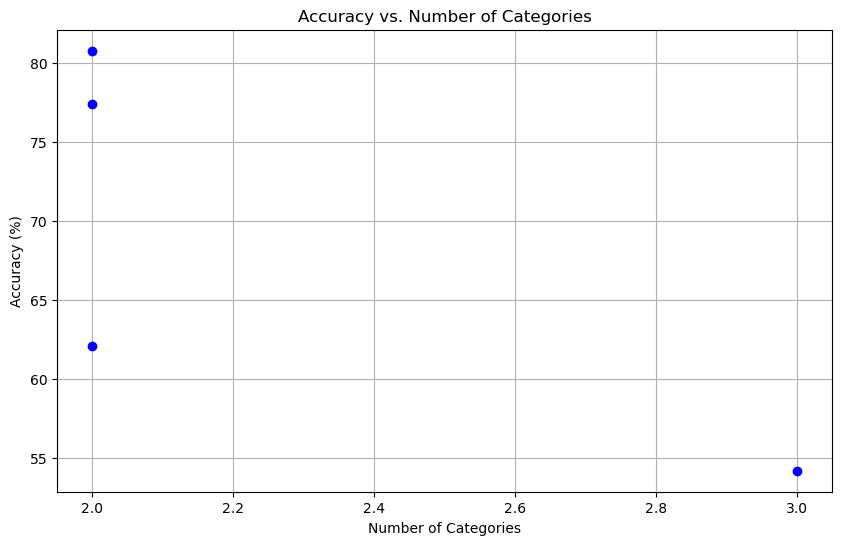

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(amount_categories, accuracies, marker='o', linestyle='None', color='blue')
plt.xlabel('Number of Categories')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Categories')
plt.grid()
plt.show()